幅広くデータを見ていく
* 加速度の波形を並べていみる
* ウィンドウフレームごとの平均，分散の変化

In [2]:
# 表示用
from tqdm import tqdm
from tqdm import tnrange, tqdm_notebook

In [3]:
import numpy as np
from numpy import zeros, newaxis
import datetime
import os
import copy
import time

# Parametor about Sensor
SensorNum=1 # Sensor number
#SensorAxis='AccX' # Axis

# Parametor about  " Sliding Window " 
WindowWidth =np.array([128,256,512,1024,2048,4096]) # Window Width
SlidingWidth =WindowWidth/4 #sliding window

# Parametor about Neural Network
AEDimention = 16

# Define Data Name
DATE= str( datetime.date.today() )+'/'
TITLE="Participants01_First_1/"

# Parametor about " Data Path"
DataPath = "/media/takeyama/Transfer/02_ActivityResearch/Paticipants01/01_First/20161018-105301/mem/"

#chopin
#StorePath = "/home/takeyama/Documents/"
#mozart
StorePath ="/media/takeyama/HD-PNFU3/01_ActivityResearchData/"
if not os.path.exists(StorePath+TITLE+'dictionary/'): 
    os.makedirs(StorePath+TITLE+'dictionary/')
DictionaryDataPath=StorePath+TITLE+'dictionary/'

if not os.path.exists(StorePath+TITLE+DATE+'window/'): 
    os.makedirs(StorePath+TITLE+DATE+'window/')
WindowDataPath=StorePath+TITLE+DATE+'window/'

if not os.path.exists(StorePath+TITLE+DATE+'studyOutput/'): 
    os.makedirs(StorePath+TITLE+DATE+'studyOutput/')
StudyOutputPath=StorePath+TITLE+DATE+'studyOutput/'

if not os.path.exists(StorePath+TITLE+DATE+'parametor/'): 
    os.makedirs(StorePath+TITLE+DATE+'parametor/')
ParametorPath=StorePath+TITLE+DATE+'parametor/'

if not os.path.exists(StorePath+TITLE+DATE+'result/'): 
    os.makedirs(StorePath+TITLE+DATE+'result/')
ResultPath=StorePath+TITLE+DATE+'result/'

if not os.path.exists(StorePath+'/'+TITLE+DATE+'graph/'): 
    os.makedirs(StorePath+'/'+TITLE+DATE+'graph/')
GraphPath=StorePath+'/'+TITLE+DATE+'graph/'

センサデータの読み込み

In [4]:
# センサデータのcsvファイル名をリストに集約する関数
def SensorDataFileNameList(path):
    l = os.listdir(DataPath)
    FilePath =[]
    SensorName = []
    
    for n in range(len(l)):
        if (l[n][:4].find('mem-') != -1):
            FilePath.append(l[n])
            SensorName.append(l[n][4:15])
    
    return FilePath,SensorName

CSVを読み込んで，CSVの中身を辞書型で表現する

In [5]:
def ImportCSV(csv_file,SensorName,mode='Round'):
    import pandas as pd
    '''
    ~Argument~
    csv_file -> ファイル名 
    mode Round -> 四捨五入
         Roundup -> 切り上げ
         Rounddown -> 切り捨て
    
    ~Conversion~
    Acc Data  [0.1mG]=>[G]
    Gyr Data  [0.01dps]=>[dps]   ...dps=degree per second
    '''
    # data dictionary 
    RawData={}   
    AccConversion = 0.1 * 0.001
    GyrConversion = 0.01
    
    # design dataframe and import csv
    data = pd.read_csv(csv_file)
    data.columns=[u'Type',u'Time',u'AccX',u'AccY',u'AccZ',u'GyrX',u'GyrY',u'GyrZ']
    data = data[ data['Type']=='ags']

    # convert numpy.darray 

    AccX=data.AccX.values*AccConversion
    AccY=data.AccY.values*AccConversion
    AccZ=data.AccZ.values*AccConversion
    
    GyrX=data.GyrX.values*GyrConversion
    GyrY=data.GyrY.values*GyrConversion
    GyrZ=data.GyrZ.values*GyrConversion

    # regist each raw data 
    RawData['AccX'] = AccX
    RawData['AccY'] = AccY
    RawData['AccZ'] = AccZ
    RawData['GyrX'] = GyrX
    RawData['GyrY'] = GyrY
    RawData['GyrZ'] = GyrZ
    RawData['Name'] = SensorName

    RawData['Time'] = data.Time.values

    return RawData

In [18]:
# FFT library
from scipy import fftpack
from scipy import signal

# Graph Plot
import matplotlib.pyplot as plt
from matplotlib import gridspec

# Generate WindowFrame Function
from mymodule import window

# timer
import time

import pandas as pd

import seaborn as sns

%matplotlib inline

In [19]:
DictName=os.listdir(DictionaryDataPath)

In [20]:
Sensor1 = np.load(DictionaryDataPath+DictName[0])['data'][()]
Sensor2 = np.load(DictionaryDataPath+DictName[1])['data'][()]
Sensor3 = np.load(DictionaryDataPath+DictName[2])['data'][()]
Sensor4 = np.load(DictionaryDataPath+DictName[3])['data'][()]
Sensor5 = np.load(DictionaryDataPath+DictName[4])['data'][()]
Sensor6 = np.load(DictionaryDataPath+DictName[5])['data'][()]

グラフプロットする

In [21]:
def MakingGraphPath(p):
    if not os.path.exists(GraphPath+p): 
        os.makedirs(GraphPath+p)
    ThisGraphPath=GraphPath+p
    return ThisGraphPath

今回，データ分析用のライブラリ**Serbonrn**を使う．  
そして，そのサンプル及び資料は
http://qiita.com/hik0107/items/3dc541158fceb3156ee0
を用いる

http://shimo-t.hatenablog.com/entry/tutorial-seaborn

実際のデータで試す  
データはどうやらPandasのデータフレームの形としなければならないらしい．

In [22]:
smp = pd.DataFrame.from_dict(Sensor1)

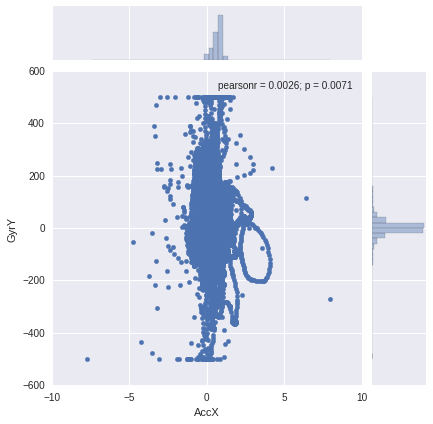

In [27]:
# mrginal histograms
sns.jointplot('AccX', 'GyrY', data=smp)

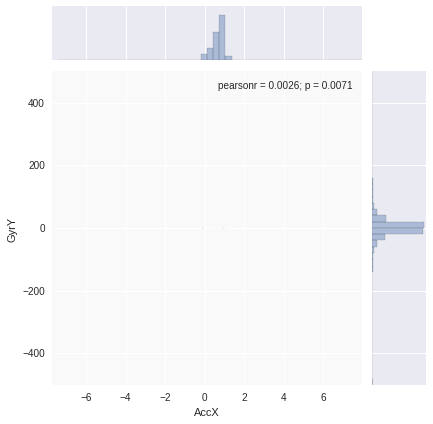

In [ ]:
# type hex
sns.jointplot('AccX', 'GyrY', data=smp, kind="hex")

In [ ]:
# type hex
sns.jointplot('AccX', 'GyrY', data=smp, kind="kde", space=0, color="g")

In [ ]:
# a different statistic for the annotation:
sns.jointplot('AccX', 'GyrY', data=smp, stat_func=spearmanr, color="m")

In [ ]:
# a scatterplot, then add a joint density estimate:
sns.jointplot('AccX', 'GyrY', data=smp, color="k")\
.plot_joint(sns.kdeplot, zorder=0, n_levels=6))

In [ ]:
#Pass vectors in directly without using Pandas, then name the axes:
sns.jointplot('AccX', 'GyrY', data=smp, kind="hex", stat_func=None)\
.set_axis_labels("x", "y")

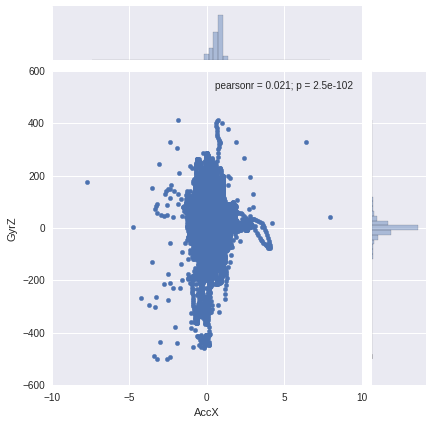

In [24]:
sns.jointplot('AccX', 'GyrZ', data=smp)

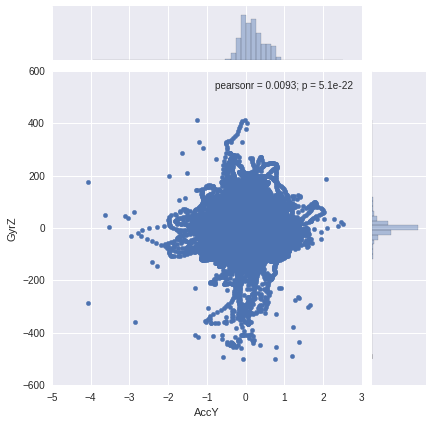

In [25]:
sns.jointplot('AccY', 'GyrZ', data=smp)

各軸の相関である  
注意としてこれは**相関係数の表ではない**

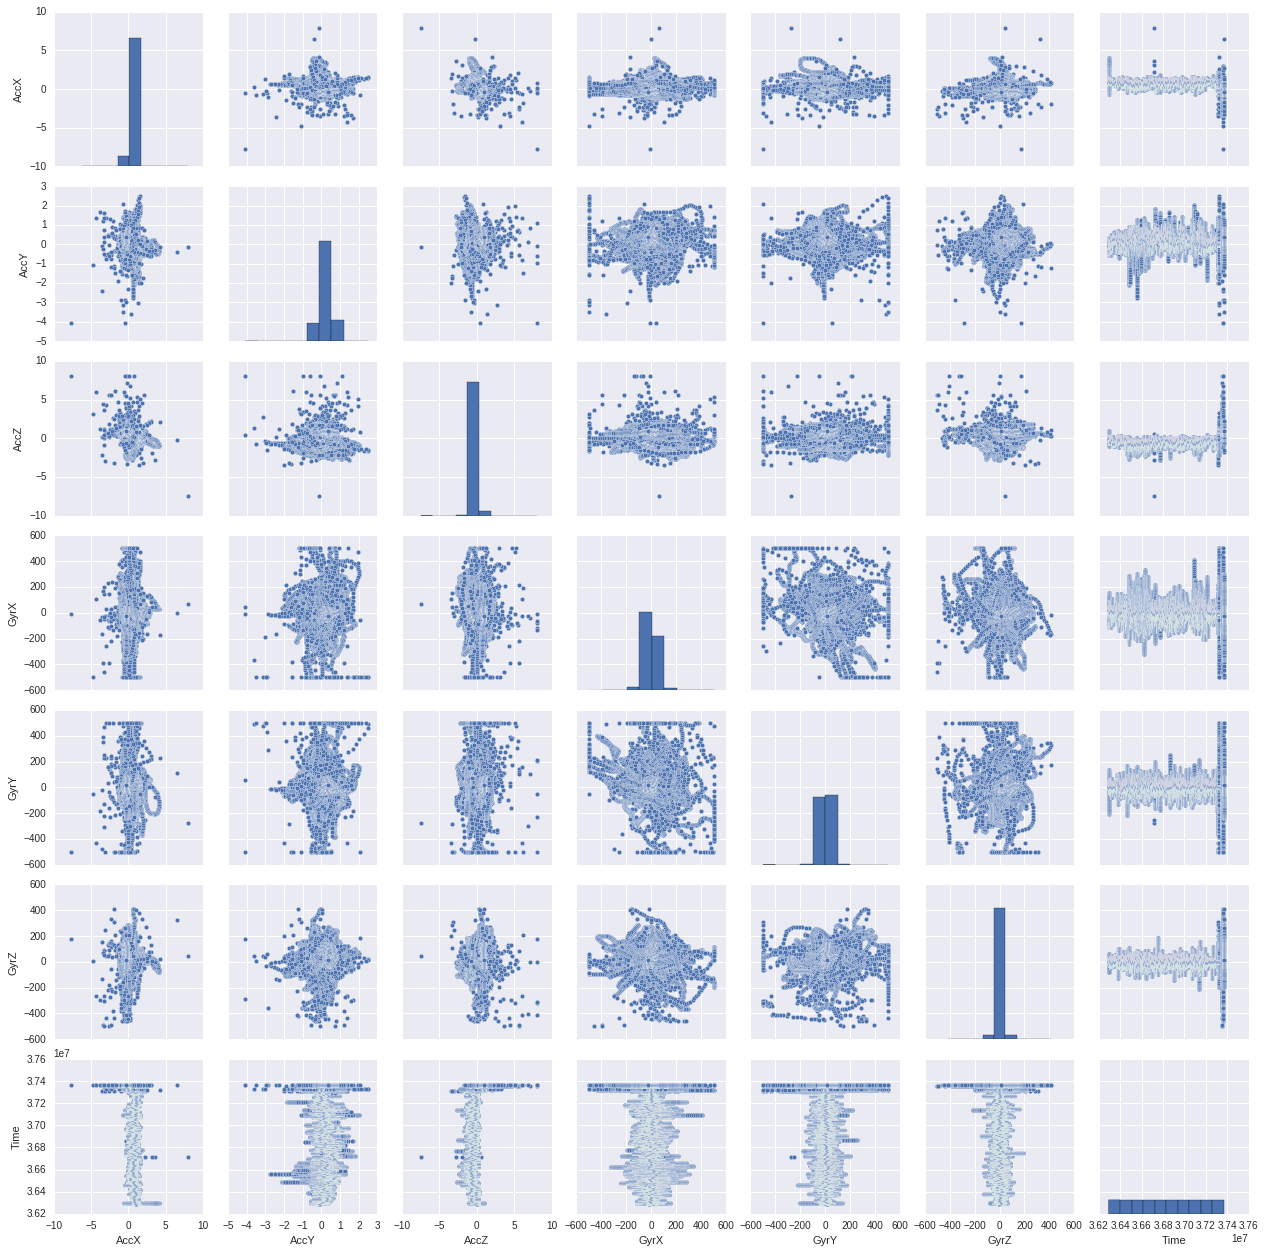

In [60]:
sns.pairplot(smp)

各軸の相関係数をヒートマップとして表現する  
参考ＵＲＬ: http://blog.rinka-blossom.com/piason-r-heatmap/

In [67]:
smp.columns[0:6]

Index([u'AccX', u'AccY', u'AccZ', u'GyrX', u'GyrY', u'GyrZ'], dtype='object')

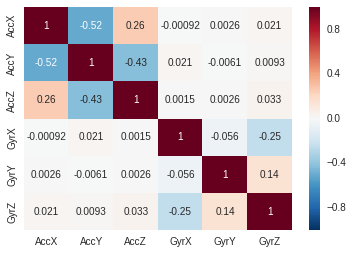

In [70]:
hm = np.corrcoef(smp[smp.columns[:6]].T)  
sns.heatmap(hm, annot=True, xticklabels=smp.columns[:6], yticklabels=smp.columns[:6])  
sns.plt.show()  